In [1]:
import os
import pandas as pd
import numpy as np
from inspect import signature
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 0. 데이터 확인

In [2]:
df = pd.read_csv('data_1.csv')

df.head()

,date,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
0,2007-01-01,1379.25,192731575,2582501187,112303.8,1780.0,697,4.97,8.12,4.92,...,449295.9,4.63,4.5,75.314,77.573,84.80,89.04,68.2,72.0,75.32
1,2007-02-01,1434.89,230584554,3353641271,114057.2,2019.1,590,4.91,11.67,4.95,...,451327.1,4.60,4.5,75.536,77.725,84.88,89.21,68.7,72.3,75.21
2,2007-03-01,1431.62,276749496,3149139880,117768.3,2492.0,687,4.79,7.88,4.94,...,452615.8,4.60,4.5,75.683,77.878,85.04,89.39,69.5,72.5,75.92
3,2007-04-01,1517.12,373783291,4472297898,116494.6,2590.4,685,4.94,9.63,4.95,...,456907.0,4.69,4.5,75.904,78.031,85.31,89.56,70.3,72.8,75.36
4,2007-05-01,1614.94,416322121,5060726750,119064.5,2475.5,704,5.10,8.22,5.04,...,461735.9,4.61,4.5,76.126,78.259,85.40,89.65,70.9,73.1,74.34


In [3]:
nCar = df.shape[0] # 데이터 개수
nVar = df.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 72 nVar: 24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              72 non-null     object 
 1   kosave            72 non-null     float64
 2   kosave_quant      72 non-null     int64  
 3   kosave_amt        72 non-null     int64  
 4   bc                72 non-null     float64
 5   ar                72 non-null     float64
 6   unsoldapt         72 non-null     int64  
 7   tr_bond           72 non-null     float64
 8   loan_apt          72 non-null     float64
 9   cd                72 non-null     float64
 10  houseloan_county  72 non-null     float64
 11  houseloan_seoul   72 non-null     float64
 12  cash_cur          72 non-null     float64
 13  deli_ratio        72 non-null     float64
 14  termdepo          72 non-null     float64
 15  interrate_call    72 non-null     float64
 16  interrate_kb      72 non-null     float64
 17 

In [5]:
df = df.set_index('date') # date를 인덱스로 지정 
df.head()

,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,houseloan_county,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1379.25,192731575,2582501187,112303.8,1780.0,697,4.97,8.12,4.92,143560.4,...,449295.9,4.63,4.5,75.314,77.573,84.80,89.04,68.2,72.0,75.32
2007-02-01,1434.89,230584554,3353641271,114057.2,2019.1,590,4.91,11.67,4.95,144021.6,...,451327.1,4.60,4.5,75.536,77.725,84.88,89.21,68.7,72.3,75.21
2007-03-01,1431.62,276749496,3149139880,117768.3,2492.0,687,4.79,7.88,4.94,143788.4,...,452615.8,4.60,4.5,75.683,77.878,85.04,89.39,69.5,72.5,75.92
2007-04-01,1517.12,373783291,4472297898,116494.6,2590.4,685,4.94,9.63,4.95,144060.0,...,456907.0,4.69,4.5,75.904,78.031,85.31,89.56,70.3,72.8,75.36
2007-05-01,1614.94,416322121,5060726750,119064.5,2475.5,704,5.10,8.22,5.04,143882.3,...,461735.9,4.61,4.5,76.126,78.259,85.40,89.65,70.9,73.1,74.34


## - test 데이터 분할

In [33]:
from sklearn.model_selection import train_test_split

feature_columns = list(df.columns.difference(['SPI'])) # target을 제외한 모든 행
X = df[feature_columns] # 설명변수
y = df['SPI'] # 타겟변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50, 22) (22, 22) (50,) (22,)


In [34]:
X_train.head()

,ar,bc,cash_cur,cci,cd,cli,cpi_jeon,cpi_total,deli_ratio,houseloan_county,...,interrate_kb,kosave,kosave_amt,kosave_quant,loan_apt,ppi_buildlease,ppi_realestate,termdepo,tr_bond,unsoldapt
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1780.0,112303.8,20677.7,68.2,4.92,72.0,75.314,77.573,0.8,143560.4,...,4.5,1379.25,2582501187,192731575,8.12,89.04,84.80,449295.9,4.97,697
2007-02-01,2019.1,114057.2,20690.0,68.7,4.95,72.3,75.536,77.725,0.9,144021.6,...,4.5,1434.89,3353641271,230584554,11.67,89.21,84.88,451327.1,4.91,590
2007-03-01,2492.0,117768.3,21296.6,69.5,4.94,72.5,75.683,77.878,0.8,143788.4,...,4.5,1431.62,3149139880,276749496,7.88,89.39,85.04,452615.8,4.79,687
2007-04-01,2590.4,116494.6,20923.8,70.3,4.95,72.8,75.904,78.031,0.8,144060.0,...,4.5,1517.12,4472297898,373783291,9.63,89.56,85.31,456907.0,4.94,685
2007-05-01,2475.5,119064.5,20833.0,70.9,5.04,73.1,76.126,78.259,0.9,143882.3,...,4.5,1614.94,5060726750,416322121,8.22,89.65,85.40,461735.9,5.10,704


In [35]:
from sklearn import preprocessing
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

# 스케일 진행
# min_max_scaler = preprocessing.MinMaxScaler()
# train_x_scaled = min_max_scaler.fit_transform(X_train)
# test_x_scaled = min_max_scaler.transform(X_test)

# MSE: 10.2818
# RMSE: 3.2065


standard_scaler = preprocessing.StandardScaler()
train_x_scaled = standard_scaler.fit_transform(X_train)
test_x_scaled = standard_scaler.transform(X_test)

# MSE: 10.1047
# RMSE: 3.1788

# # rob_scaler = preprocessing.RobustScaler()
# # X_train_scale = rob_scaler.fit_transform(X_train)
# # test_x_scaled = rob_scaler.transform(X_test)

# MSE: 10.2818
# RMSE: 3.2065
    
    
# Max_Abs_Scaler = preprocessing.MaxAbsScaler()
# X_train_scale = Max_Abs_Scaler.fit_transform(X_train)
# test_x_scaled = Max_Abs_Scaler.transform(X_test)

# MSE: 10.2818
# RMSE: 3.2065

In [9]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.model_selection import cross_val_score


# # xgb_pipeline = Pipeline[("st_scaler", StandardScaler()), ("xgb_model", XGBRegressor())]

# # scores = cross_val_score(xgb_pipeline, X_train, y_train, scoring="neg_mean_squared_error",cv=10)

# # final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

# # print("Final XGB RMSE:", final_avg_rmse)

# gbm_param_grid ={'xgb_model__subsample': np.arange(.05, 1, .05), 
#                  'xgb_model__max_depth': np.arange(3,20,1), 'xgb_model__colsample_bytree': np.arange(.1,1.05,.05) }

# randomized_neg_mse = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=gbm_param_grid, 
#                                         n_iter=10, scoring='neg_mean_squared_error', cv=4)

# randomized_neg_mse.fit(X_train, y_train)

In [10]:
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.preprocessing import MinMaxScaler

# pipe = Pipeline([("scaler", MinMaxScaler()),
#                  ("svr", SVR())])

# param = {'svr__kernel':('linear', 'ploy', 'sigmoid', 'rbf'), 
#          'svr__C': [1,2, 3, 5, 10], 
#          'svr__degree': [1,3,5,10],
#          'svr__gamma': [0.01, 0.1, 0.2, 0.5]}


# grid = GridSearchCV(pipe, param_grid=param, cv=kf, scoring='neg_mean_squared_error')

# # 점수
# grid.fit(X_train_scale, y_train)

In [11]:

# xgb1 = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07, 0.1], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(train_x_scaled,
#          y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [12]:
# params = xgb_grid.best_params_

# model_xgb  = XGBRegressor(**params)
# model_xgb.fit(train_x_scaled, y_train)

# # make predictions 
# predictions = my_model.predict(test_x_scaled) 

# print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))


# # model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
# #                              learning_rate=0.05, max_depth=3, 
# #                              min_child_weight=1.7817, n_estimators=2200,
# #                              reg_alpha=0.4640, reg_lambda=0.8571,
# #                              subsample=0.5213, silent=1,
# #                              random_state =7, nthread = -1)

# # reg = GridSearchCV(estimator=xgb_model, scoring=None,
# #                    param_grid= {'max_depth': [2], 'n_estimators': [50]}, 
# #                    cv=folds,
# #                    verbose=False)

# 2. XGBoost Regression

In [13]:
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot

from sklearn.metrics import explained_variance_score

my_model = XGBRegressor() 

# Add silent=True to avoid printing out updates with each cycle 
my_model.fit(train_x_scaled, y_train, verbose=False) 

# make predictions 
predictions = my_model.predict(test_x_scaled) 

from sklearn.metrics import mean_absolute_error 
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))


[11:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error : 4.4134315906871455


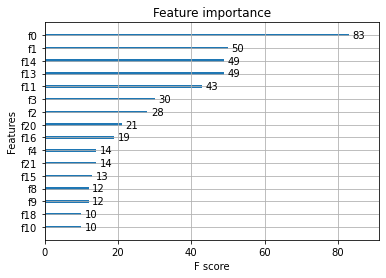

In [14]:
xgboost.plot_importance(my_model)
pyplot.show()

In [15]:
predictions = my_model.predict(test_x_scaled)
predictions

array([82.48134 , 83.00683 , 83.83581 , 83.731995, 83.8535  , 83.85564 ,
       83.731995, 83.8535  , 83.504875, 83.35209 , 83.43401 , 83.78264 ,
       83.35209 , 83.33416 , 83.38773 , 83.493065, 82.96012 , 82.85962 ,
       82.826294, 82.85962 , 82.85482 , 82.946434], dtype=float32)

In [16]:
r_sq = my_model.score(train_x_scaled, y_train)

print('**explained_variance_score: 예측값에 의해 설명되는 분산의 정도를 의미함')
print('='*50)
print('train set에 대한 결과 : ', r_sq)
print('검증 세트에 대한 결과 : ', explained_variance_score(predictions,y_test))


**explained_variance_score: 예측값에 의해 설명되는 분산의 정도를 의미함
train set에 대한 결과 :  0.9996964830841693
검증 세트에 대한 결과 :  -41.81255216285019


[12:18:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


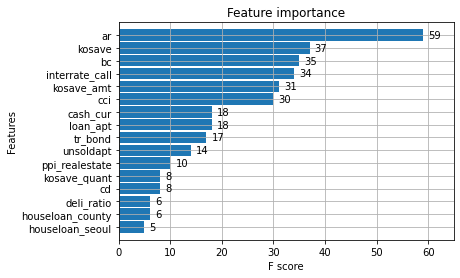

In [37]:
XG_model_month = XGBRegressor(n_estimators=1000)
XG_model_month.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model_month, height=0.9)

In [17]:
'''
GridSearchCV 이용 XGBRegressor 파라미터 튜닝
'''

print(signature(xgboost.XGBRegressor))

(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs)


In [18]:
# # 파라미터 튜닝

# params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)], 
#           'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# # Initialize XGB and GridSearch
# xgb = XGBRegressor(nthread=-1) 

# grid = GridSearchCV(xgb, params)
# grid.fit(X_train, y_train)

# print("Best 파라미터 :", grid.best_params_)



Best 파라미터 : 
    
    {'colsample_bytree': 0.5, 'gamma': 0.03, 'max_depth': 2, 'min_child_weight': 1.1, 'subsample': 0.5}    

In [19]:
# params = grid.best_params_

# model_xgb  = XGBRegressor(**params)
# model_xgb.fit(X_train, y_train)


model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# reg = GridSearchCV(estimator=xgb_model, scoring=None,
#                    param_grid= {'max_depth': [2], 'n_estimators': [50]}, 
#                    cv=folds,
#                    verbose=False)

In [20]:
scores = cross_val_score(model_xgb, train_x_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
score = (scores*-1).mean()
rmse = np.sqrt((scores*-1).mean())

print("MSE: %0.4f" % (score))
print("RMSE: %0.4f" % (rmse))

MSE: 7.6784
RMSE: 2.7710


In [21]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 2.3463 (1.5053)



In [32]:
#define a rmsle evaluation function
from sklearn.metrics import mean_squared_error, mean_absolute_error

'''
RMSLE (RMS(Log)E) : RMSE에 로그를 적용한 것이다. 
결정 값이 클 수록 오류 값도 커지기 때문에 일부 큰 오류 값들로인해 전체 오류값이 커지는 것을 막아준다.
'''

def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

model_xgb.fit(train_x_scaled, y_train)
xgb_train_pred = model_xgb.predict(test_x_scaled)
y_pred = np.expm1(model_xgb.predict(test_x_scaled))
print('RMSLE (RMS(Log)E) :', rmsle(y_test, xgb_train_pred))

RMSLE (RMS(Log)E) : 4.091102514795836


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE
y_pred = model_xgb.predict(test_x_scaled)
MAE = mean_absolute_error(y_test, y_pred)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(y_test, y_pred)

# MASE
def mean_absolute_scaled_error(training_series, testing_series, prediction_series):   
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

MASE = mean_absolute_scaled_error(y_train, y_test, y_pred)

# 평가지표 출력
print("MAE: %0.4f" % (MAE))
print("MAPE: %0.4f" % (MAPE))
print("MASE: %0.4f" % (MASE))

MAE: 3.4422
MAPE: 4.4651
MASE: 2.9253


In [25]:
xgb = model_xgb.fit(train_x_scaled, y_train )
y_pred = xgb.predict(test_x_scaled).reshape(-1,1)
y_pred = pd.DataFrame(y_pred)
y_pred

# 검증 예측
vaild_set_predict = pd.DataFrame(y_test)
vaild_set_predict['predict'] = y_pred.values
vaild_set_predict.rename(columns = {'SPI':'true'}, inplace=True)
vaild_set_predict.head(15)

,true,predict
date,,
2011-03-01,83.35,82.718582
2011-04-01,82.78,83.169922
2011-05-01,82.20,83.005638
2011-06-01,81.70,83.268021
2011-07-01,81.77,83.335915
2011-08-01,81.93,83.156395
2011-09-01,81.76,83.356705
2011-10-01,81.15,83.117012
2011-11-01,80.43,82.538872


In [26]:
# 훈련 예측
y_pred_train = model_xgb.predict(train_x_scaled).reshape(-1,1)
y_pred_train = pd.DataFrame(y_pred_train)

train_set_predict = pd.DataFrame(y_train)
train_set_predict['predict'] = y_pred_train.values
train_set_predict.rename(columns={'SPI':'true'}, inplace=True)
train_set_predict.head()

,true,predict
date,,
2007-01-01,75.32,75.262611
2007-02-01,75.21,75.444481
2007-03-01,75.92,75.704590
2007-04-01,75.36,75.347603
2007-05-01,74.34,74.419502


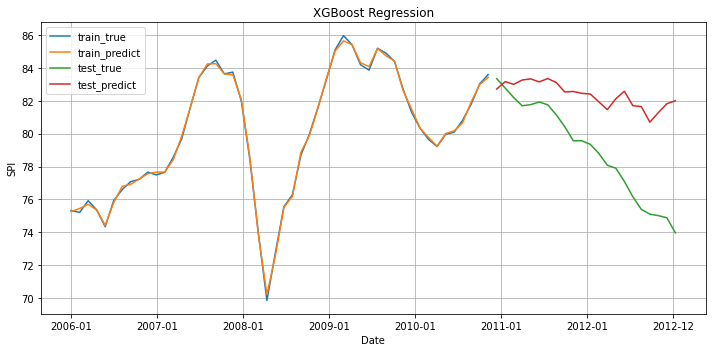

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
grid = fig.add_subplot(1,1,1)
grid.plot(train_set_predict['true'], label='train_true')
grid.plot(train_set_predict['predict'], label='train_predict')
grid.plot(vaild_set_predict['true'], label='test_true')
grid.plot(vaild_set_predict['predict'], label='test_predict')

grid.set_title('XGBoost Regression')
plt.xticks(np.arange(0, 80, 10.1),  
           labels=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01', '2011-01', '2012-01','2012-12'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')
grid.grid(True)

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()